In [29]:
import sys
# !{sys.executable} -m pip install pyvis
# !{sys.executable} -m pip install datashader
!{sys.executable} -m pip install leidenalg


In [1]:
hash('Hallo mijn nam is kamiel')

-1797347457666682785

In [375]:
np.random.choice([i for i in range (100)], p= [1/100 for i in range(100)])

61

In [377]:
np.random.power(.5,[i for i in range (100)] )

ValueError: maximum supported dimension for an ndarray is 32, found 100

In [2]:
from pyvis.network import Network
import networkx as nx
import pandas as pd
import math
import numpy as np
from scipy import stats

import pylab 

import powerlaw


import datashader as ds
import datashader.transfer_functions as tf
from datashader.layout import random_layout, circular_layout, forceatlas2_layout
from datashader.bundling import connect_edges, hammer_bundle
import matplotlib.pyplot as plt
# from py3plex.core import multinet

from itertools import chain
import random
import seaborn as sn

In [388]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [443]:
xs = []
for i in range(1000):
    xs.append(random.choices([i for i in range(100)], weights=[i for i in range (100)])[0])
    print(xs)





[80]
[80, 44]
[80, 44, 18]
[80, 44, 18, 64]
[80, 44, 18, 64, 43]
[80, 44, 18, 64, 43, 33]
[80, 44, 18, 64, 43, 33, 44]
[80, 44, 18, 64, 43, 33, 44, 80]
[80, 44, 18, 64, 43, 33, 44, 80, 81]
[80, 44, 18, 64, 43, 33, 44, 80, 81, 25]
[80, 44, 18, 64, 43, 33, 44, 80, 81, 25, 36]
[80, 44, 18, 64, 43, 33, 44, 80, 81, 25, 36, 97]
[80, 44, 18, 64, 43, 33, 44, 80, 81, 25, 36, 97, 87]
[80, 44, 18, 64, 43, 33, 44, 80, 81, 25, 36, 97, 87, 75]
[80, 44, 18, 64, 43, 33, 44, 80, 81, 25, 36, 97, 87, 75, 87]
[80, 44, 18, 64, 43, 33, 44, 80, 81, 25, 36, 97, 87, 75, 87, 38]
[80, 44, 18, 64, 43, 33, 44, 80, 81, 25, 36, 97, 87, 75, 87, 38, 88]
[80, 44, 18, 64, 43, 33, 44, 80, 81, 25, 36, 97, 87, 75, 87, 38, 88, 78]
[80, 44, 18, 64, 43, 33, 44, 80, 81, 25, 36, 97, 87, 75, 87, 38, 88, 78, 43]
[80, 44, 18, 64, 43, 33, 44, 80, 81, 25, 36, 97, 87, 75, 87, 38, 88, 78, 43, 68]
[80, 44, 18, 64, 43, 33, 44, 80, 81, 25, 36, 97, 87, 75, 87, 38, 88, 78, 43, 68, 83]
[80, 44, 18, 64, 43, 33, 44, 80, 81, 25, 36, 97, 87, 75

(array([ 15.,  29.,  62.,  56., 103., 127., 121., 135., 170., 182.]),
 array([ 2. , 11.7, 21.4, 31.1, 40.8, 50.5, 60.2, 69.9, 79.6, 89.3, 99. ]),
 <BarContainer object of 10 artists>)

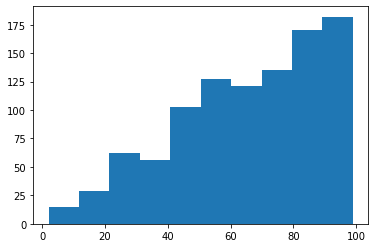

In [444]:
plt.hist(xs)


86100

In [43]:
nodes = pd.concat([df['source'],df['destination']]).unique()

print(len(nodes))

pd.DataFrame({'Nodes': nodes}).to_csv('gephi_nodes.csv')

edges = df[['source', 'destination']]

edges.to_csv('gephi_edges.csv')

79422


In [68]:
G = nx.from_pandas_edgelist(df, 'source', 'destination', create_using=nx.DiGraph())

In [69]:
nodes = pd.DataFrame()
temp_df = pd.concat([df['source'],df['destination']])

temp_df = pd.factorize(df.source)[0] + 1

length = np.array_split(temp_df, 2)

df_ = pd.DataFrame()
df_['source'] = length[0]
df_['destination'] = length[1]


nodes['name'] = pd.unique(df_[['source', 'destination']].values.ravel('K'))

In [70]:
circular  = circular_layout(nodes, uniform=False)
randomloc = random_layout(nodes)
randomloc.tail()


,name,x,y
76863,76864,0.043105,0.091400
76864,76865,0.745748,0.422766
76865,76866,0.104676,0.288981
76866,76867,0.166508,0.523104
76867,76868,0.677717,0.935504


Random layout,Circular layout

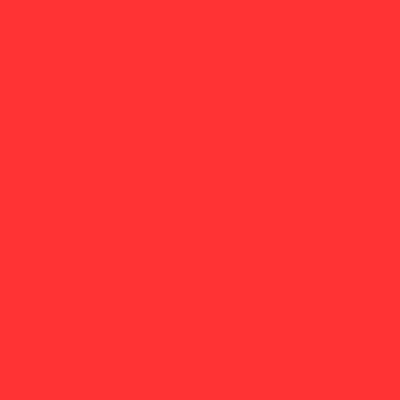
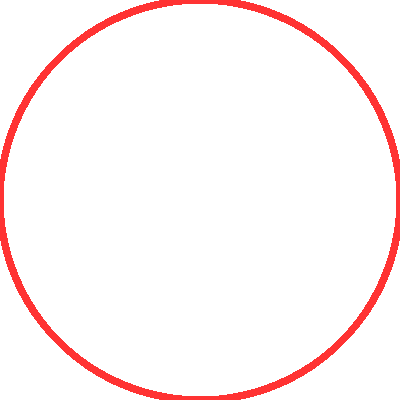

In [71]:
cvsopts = dict(plot_height=400, plot_width=400)

def nodesplot(nodes, name=None, canvas=None, cat=None):
    canvas = ds.Canvas(**cvsopts) if canvas is None else canvas
    aggregator=None if cat is None else ds.count_cat(cat)
    agg=canvas.points(nodes,'x','y',aggregator)
    return tf.spread(tf.shade(agg, cmap=["#FF3333"]), px=3, name=name)

tf.Images(nodesplot(randomloc,"Random layout"),
          nodesplot(circular, "Circular layout"))

In [73]:
df_ = df_.rename(columns={"destination": "target"})

In [75]:
print(df_)

%time 

df_ = df_[['source', 'target']]

forcedirected = forceatlas2_layout(nodes, df_)
tf.Images(nodesplot(forcedirected, "ForceAtlas2 layout"))

        source  target
0            1   36643
1            2   36688
2            3   35201
3            4   37778
4            5   37603
...        ...     ...
245037   36826   76770
245038   34668   76802
245039   36776   76645
245040   34834   76697
245041   37620   76862

[245042 rows x 2 columns]
Wall time: 0 ns


KeyboardInterrupt: 

In [ ]:
def edgesplot(edges, name=None, canvas=None):
    canvas = ds.Canvas(**cvsopts) if canvas is None else canvas
    return tf.shade(canvas.line(edges, 'x','y', agg=ds.count()), name=name)
    
def graphplot(nodes, edges, name="", canvas=None, cat=None):
    if canvas is None:
        xr = nodes.x.min(), nodes.x.max()
        yr = nodes.y.min(), nodes.y.max()
        canvas = ds.Canvas(x_range=xr, y_range=yr, **cvsopts)
        
    np = nodesplot(nodes, name + " nodes", canvas, cat)
    ep = edgesplot(edges, name + " edges", canvas)
    return tf.stack(ep, np, how="over", name=name)

In [ ]:
cd = circular
fd = forcedirected

# cd_d = graphplot(cd, connect_edges(cd,df), "Circular layout")
# fd_d = graphplot(fd, connect_edges(fd,df), "Force-directed") 
# cd_b = graphplot(randomloc, hammer_bundle(randomloc,df), "Circular layout, bundled")
fd_b = graphplot(fd, hammer_bundle(fd,df), "Force-directed, bundled") 

tf.Images(fd_d).cols(2)

In [66]:
def hash_groups():
    hash_dict = {}
    rehash_dict = {}

    df = pd.read_csv('Data/tab_n_(with oplniv).csv')

    for i in range(df.shape[0]):
        group = df.iloc[i]
                
        age = group['lft']
        etnc = group['etngrp']
        gender = group['geslacht']
        education = group['oplniv']


        hash_dict[f'{age}, {etnc}, {gender}, {education}'] = i
        rehash_dict[i] = f'{age}, {etnc}, {gender}, {education}' 
    
    return hash_dict, rehash_dict

hash_dict, rehash_dict = hash_groups()

rehash_dict[12]

# hash_dict['[0,20), Autochtoon, Vrouw, 1']

'[0,20), Autochtoon, Vrouw, 1'

In [75]:
df = pd.read_csv(f'Data/NW_data/huishouden_nw_b=0_1_percentage.csv')

In [70]:

df_s = df[(df['source_group'] == 6) & (df['destination_group'] == 12)]

In [71]:
df

,Unnamed: 0,source_id,destination_id,source_group,destination_group
0,0,67799,92177,6,7
1,1,92177,67799,7,6
2,2,87419,92229,6,7
3,3,92229,87419,7,6
4,4,62805,92204,6,7
...,...,...,...,...,...
6142865,6142865,518320,515470,71,71
6142866,6142866,519713,519899,71,71
6142867,6142867,519899,519713,71,71
6142868,6142868,518256,519832,71,71


In [77]:
(nx.overall_reciprocity(G))

0.6668319931481794

In [27]:
df = pd.read_csv(f'Data/NW_data/werkschool_nw_b=1_try_100_percentage.csv')


In [45]:
df_s = df[(df['source_group'] == 6) & (df['destination_group'] == 40)]

In [78]:
df_duplicates = df[df.duplicated(subset=['source_id','destination_id'], keep=False)]

df_duplicates


,Unnamed: 0,source_id,destination_id,source_group,destination_group


In [76]:
G = nx.from_pandas_edgelist(df, 'source_id', 'destination_id',create_using=nx.DiGraph())


In [46]:
G_s = nx.from_pandas_edgelist(df_s, 'source_id', 'destination_id',create_using=nx.DiGraph())

In [48]:
print(len(G_s.edges()))


# print(len(G))

# G.degree()
# degrees = {i[1]:i[0] for i in G.in_degree()}
l_degrees = [ i[1] for i in G.in_degree()]
l_degrees_s = [ i[1] for i in G_s.in_degree()]

# print(len(l_degrees))
# nx.overall_reciprocity(G)
29362450

630


29362450

In [14]:
df_duplicates = df[df.duplicated(subset=['source_id','destination_id'], keep=False)]

df_duplicates



,Unnamed: 0,source_id,destination_id,source_group,destination_group


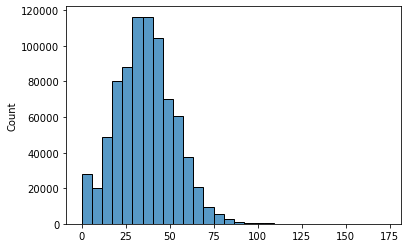

In [51]:
sn.histplot(data=l_degrees, bins = 30)
plt.show()




In [21]:
print(max(l_degrees))

x = [i for i in l_degrees if i > 250]

317


In [22]:
len(x)

15

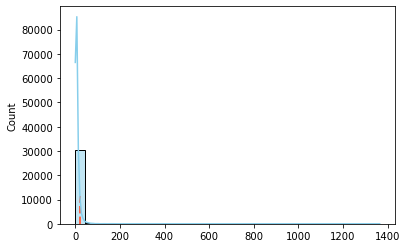

In [364]:
def rndm(a, b, g, size=1):
    """Power-law gen for pdf(x)\propto x^{g-1} for a<=x<=b"""
    r = np.random.random(size=size)
    ag, bg = a**g, b**g
    return (ag + (bg - ag)*r)**(1./g)

xx = rndm(1, 2, g=-2, size=1000000)

from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

samples = np.random.randn(300) ** -5
ax = sns.histplot(l_degrees, bins=30, kde=True, color='skyblue')
kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
# mode_idx = np.argmax(ys)
ax.vlines(xs[mode_idx], 0, ys[mode_idx], color='tomato', ls='--', lw=2)
plt.show()

In [25]:
# data = list(df_s['destination_id'].value_counts().value_counts())
l_degrees

x = powerlaw.Fit(l_degrees_s)

D = x.D

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


In [26]:


x.distribution_compare('power_law', 'exponential')



(126.62976213221413, 1.6101237545237924e-10)

C:\Users\KGulp\anaconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


<AxesSubplot:>

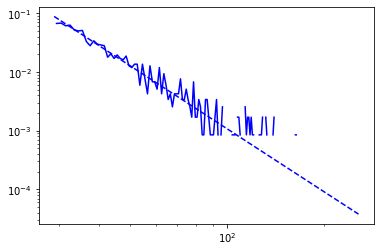

In [76]:
fig2 = x.plot_pdf(color='b', linear_bins = True)

x.power_law.plot_pdf(color='b', linestyle='--', ax=fig2)



In [331]:
powerlaw.plot_pdf(l_degrees, linear_bins=True, color='r')

C:\Users\KGulp\anaconda3\lib\site-packages\powerlaw.py:1955: RuntimeWarning: divide by zero encountered in long_scalars
  xmax2=xmax/xmin


OverflowError: cannot convert float infinity to integer

In [12]:
x = sorted((list(df['destination_id'].value_counts())))

from collections import Counter

y = list(Counter(x).values())
x = list(Counter(x).keys())
# # df_s['destination_id'].value_counts()

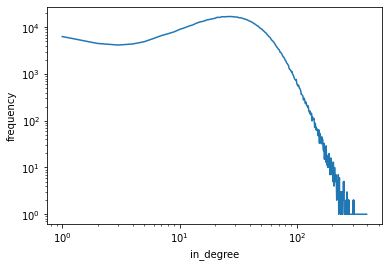

In [13]:

plt.plot(x,y)

plt.xlabel('in_degree')
plt.ylabel('frequency')
plt.yscale('log')
plt.xscale('log')

In [447]:
BG = nx.barabasi_albert_graph(300, 200, seed=None)

bg_degrees = [ i[1] for i in BG.degree()]


print(bg_degrees)

[74, 74, 84, 63, 77, 71, 72, 73, 80, 80, 76, 79, 79, 74, 75, 82, 74, 77, 74, 72, 80, 82, 78, 79, 71, 71, 83, 78, 74, 81, 80, 79, 82, 76, 74, 78, 74, 80, 79, 62, 74, 78, 69, 72, 86, 77, 77, 77, 74, 62, 70, 67, 75, 72, 84, 79, 81, 70, 81, 76, 78, 83, 80, 85, 79, 73, 71, 79, 86, 69, 86, 70, 76, 80, 85, 83, 72, 74, 73, 66, 72, 77, 79, 76, 67, 79, 69, 78, 80, 77, 65, 74, 76, 69, 73, 78, 73, 75, 84, 83, 73, 81, 74, 68, 84, 73, 72, 82, 78, 76, 71, 69, 76, 79, 86, 73, 88, 78, 86, 80, 76, 73, 74, 70, 67, 72, 73, 66, 73, 77, 84, 72, 82, 75, 69, 78, 74, 78, 73, 77, 70, 81, 75, 77, 80, 84, 65, 78, 77, 69, 71, 75, 81, 70, 77, 81, 65, 74, 73, 75, 80, 67, 77, 69, 74, 84, 78, 74, 77, 77, 77, 70, 75, 72, 76, 76, 69, 86, 69, 84, 77, 79, 81, 72, 83, 74, 83, 76, 76, 81, 76, 71, 77, 77, 76, 75, 75, 70, 84, 82, 299, 296, 294, 295, 295, 293, 293, 291, 289, 290, 287, 288, 286, 285, 284, 284, 282, 281, 280, 280, 277, 277, 276, 274, 275, 274, 270, 270, 271, 269, 268, 266, 267, 264, 264, 262, 262, 262, 259, 260,

<AxesSubplot:ylabel='Count'>

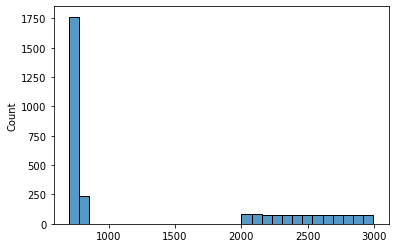

In [440]:
sn.histplot(bg_degrees, bins = 30)

In [355]:
shapiro_test = stats.shapiro(l_degrees)
normal_test = stats.normaltest(l_degrees)
jacques_bera = stats.jarque_bera(l_degrees)

# print(shapiro_test)
print(shapiro_test[1],normal_test[1],jacques_bera[1])

0.0 3.6539734050327178e-124 0.0


C:\Users\KGulp\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [334]:
graphs = []
types = ['werkschool']
for type in types:
    df = pd.read_csv(f'Data/NW_data/{type}_nw_b=1.csv')
    G = nx.from_pandas_edgelist(df, 'source_id', 'destination_id',['source_group', 'destination_group'] ,create_using=nx.DiGraph())
    
    graphs.append(G)

KeyboardInterrupt: 

In [350]:
graphs = [G]


def get_type_node(G, id):
    print(list(G[id].values())[0])
    return list(G[id].values())[0]['source_group']


29362450


In [352]:
l_n_edges = []
l_n_nodes = []
l_average_in_degees = []
l_type_max_in_degree = []
l_average_out_degrees = []
l_type_max_out_degree = []
l_average_cluster_coefficient = []
l_type_highest_cluster_coefficient = []
l_reciprocity = []

for G in graphs:
    
    
    # Number of edges
    n_edges = G.number_of_edges()
    l_n_edges.append(n_edges)
    
    # Number of nodes
    n_nodes = G.number_of_nodes() 
    l_n_nodes.append(n_nodes)
    
    # Calculate degree
    G.degree()
    degrees = {i[1]:i[0] for i in G.degree()}
    l_degrees = [ i[1] for i in G.degree()]

    average_degree = np.mean(l_degrees)

    # Calculate indegree
    G.in_degree()
    in_degrees = {i[1]:i[0] for i in G.in_degree()}
    l_in_degrees = [ i[1] for i in G.in_degree()]


    max_in_degree = max(in_degrees.keys())
    id_max_in_degree = in_degrees[max(in_degrees.keys())]
#     type_max_in_degree = get_type_node(G,id_max_in_degree)
#     l_type_max_in_degree.append(type_max_in_degree)
    
    average_in_degree = np.mean(l_in_degrees)
    l_average_in_degees.append(average_in_degree)

    # Calculate outdegree
    G.out_degree()
    out_degrees = {i[1]:i[0] for i in G.out_degree()}
    l_out_degrees = [ i[1] for i in G.out_degree()]

    max_out_degree = max(out_degrees.keys())
    id_max_out_degree = out_degrees[max(out_degrees.keys())]
#     type_max_out_degree = list(G[id_max_out_degree].values())[0]['source_group']
#     l_type_max_out_degree.append(type_max_out_degree)
    
    average_out_degree = np.mean(l_out_degrees)
    l_average_out_degrees.append(average_out_degree)

#     # Density
#     density = nx.classes.function.density(G)
    
#     # Cluster coefficient
#     cluster_coefficient = nx.clustering(G)
    
#     highest_cluster_coefficient = max(cluster_coefficient.values())

#     id_highest_cluster_coefficient = (list(cluster_coefficient.keys())
#                                    [list(cluster_coefficient.values()).index(highest_cluster_coefficient)])  # Prints george

    
    l_reciprocity.append(nx.overall_reciprocity(G))

In [355]:
total_nodes = [86100] * 1

# l_type_max_in_degree = [rehash_dict[i] for i in l_type_max_in_degree]
# l_type_max_out_degree = [rehash_dict[i] for i in l_type_max_out_degree]


print(l_type_max_in_degree)
df_stats = pd.DataFrame({'edges' : l_n_edges,
                         'nodes' : total_nodes,
                         'connected_nodes' : l_n_nodes,
                         'avg indegree':l_average_in_degees, 
#                          'max in degree': l_type_max_in_degree, 
                         'avg out degree':l_average_out_degrees,
#                          'max out degree':l_type_max_out_degree,
                         'reciprocity' : l_reciprocity},
                         index = types)
#                          'max cluster coefficient':l_type_highest_cluster_coefficient, 
#                          }, 
                      

[]


In [356]:
df_stats

,edges,nodes,connected_nodes,avg indegree,avg out degree,reciprocity
werkschool,29362450,86100,806306,36.416013,36.416013,0.000181


In [485]:
df = pd.read_csv(f'Data/NW_data/{type}_nw_b=0.csv')
G = nx.from_pandas_edgelist(df, 'source_id', 'destination_id',['source_group', 'destination_group'] ,create_using=nx.DiGraph())

In [486]:
G.in_degree()
in_degrees = {i[1]:i[0] for i in G.in_degree()}
l_in_degrees = [ i[1] for i in G.in_degree()]


max_in_degree = max(in_degrees.keys())
id_max_in_degree = in_degrees[max(in_degrees.keys())]
type_max_in_degree = get_type_node(G,id_max_in_degree)
l_type_max_in_degree.append(type_max_in_degree)

[0,20), Turks, Man, 3


In [462]:
type_max_in_degree

rehash_dict[58]



'[0,20), Overig, Man, 2'

In [363]:
df = pd.read_csv('Data/NW_data/huishouden_nw_test.csv')
G = nx.from_pandas_edgelist(df, 'source_id', 'destination_id',['source', 'destination'] ,create_using=nx.DiGraph())

In [364]:
nx.overall_reciprocity(G)

1.0

In [365]:
df

,Unnamed: 0,source_id,destination_id,source,destination,layer
0,0,7_140,6_4590,"7_140, [0,20), Autochtoon, 2","6_4590, [0,20), Autochtoon, 1",1
1,1,6_4590,7_140,"6_4590, [0,20), Autochtoon, 1","7_140, [0,20), Autochtoon, 2",1
2,2,7_690,6_4985,"7_690, [0,20), Autochtoon, 2","6_4985, [0,20), Autochtoon, 1",1
3,3,6_4985,7_690,"6_4985, [0,20), Autochtoon, 1","7_690, [0,20), Autochtoon, 2",1
4,4,7_1319,6_11890,"7_1319, [0,20), Autochtoon, 2","6_11890, [0,20), Autochtoon, 1",1
...,...,...,...,...,...,...
417,417,6_18550,7_1004,"6_18550, [0,20), Autochtoon, 1","7_1004, [0,20), Autochtoon, 2",1
418,418,7_1632,6_17306,"7_1632, [0,20), Autochtoon, 2","6_17306, [0,20), Autochtoon, 1",1
419,419,6_17306,7_1632,"6_17306, [0,20), Autochtoon, 1","7_1632, [0,20), Autochtoon, 2",1
420,420,7_1491,6_12638,"7_1491, [0,20), Autochtoon, 2","6_12638, [0,20), Autochtoon, 1",1


In [367]:
df = df[df.duplicated(subset=['source_id','destination_id'], keep=False)]

df

,Unnamed: 0,source_id,destination_id,source,destination,layer


In [344]:
df1= pd.DataFrame({
        'Grade': ['A','C','B','Ex']})
df2 = pd.DataFrame({
        'Grade': ['A','B','F','X', 'D', 'F', 'C','A']})

df1


,Grade
0,A
1,C
2,B
3,Ex


In [365]:
np.asarray([i for i in range(1, 220, 5)]) ** 2

array([    1,    36,   121,   256,   441,   676,   961,  1296,  1681,
        2116,  2601,  3136,  3721,  4356,  5041,  5776,  6561,  7396,
        8281,  9216, 10201, 11236, 12321, 13456, 14641, 15876, 17161,
       18496, 19881, 21316, 22801, 24336, 25921, 27556, 29241, 30976,
       32761, 34596, 36481, 38416, 40401, 42436, 44521, 46656],
      dtype=int32)

In [ ]:
graphs = []
types = ['huishouden', 'familie', 'buren', 'werkschool']
for type in types:
    df = pd.read_csv(f'Data/NW_data/{type}_nw.csv')
    G = nx.from_pandas_edgelist(df, 'source_id', 'destination_id',['source_group', 'destination_group'] ,create_using=nx.DiGraph())
    
    graphs.append(G)

NameError: name 'pd' is not defined

In [52]:
# g.get_edgelist()

# G.edges()

In [16]:
random.choices([1,2,3,4,5,6,7,8,9,10],k=10)

[8, 8, 1, 9, 7, 6, 10, 7, 6, 1]